In [14]:
# Imports
import torch
import torchvision
import torch.nn as nn
from torchvision import transforms
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from torch.utils.data import Subset, DataLoader
import matplotlib.pylab as plt
import numpy as np
from PIL import Image

# Dataset
link: 'https://www.kaggle.com/datasets/arnavr10880/concrete-crack-images-for-classification'

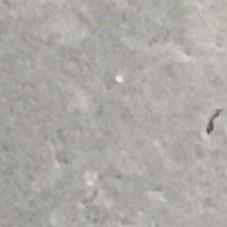

In [2]:
# Analyze the data
analysis_image = Image.open('/home/abdul/GitHub/Pytorch/Binary_Image_Classification/Concrete_Crack_Dataset/Negative/00001.jpg')
analysis_image.size
analysis_image

In [3]:
# Transformations
'''
Based on Analysis:
1. We must convert the image to gray scale, for computational efficency.
2. Normalization
3. flip transformation
4. convert to tensors
'''

transformations = transforms.Compose([
    transforms.Resize((32)),
    transforms.Grayscale(num_output_channels=1),
    transforms.ToTensor(),
    transforms.Normalize((0.5),(0.5)),
])

In [ ]:
# Load the data
data = torchvision.datasets.ImageFolder(root = 'Binary_Image_Classification/Concrete_Crack_Dataset', transform=transformations)
data

Dataset ImageFolder
    Number of datapoints: 40000
    Root location: /home/abdul/GitHub/Pytorch/Binary_Image_Classification/Concrete_Crack_Dataset
    StandardTransform
Transform: Compose(
               Resize(size=32, interpolation=bilinear, max_size=None, antialias=True)
               Grayscale(num_output_channels=1)
               ToTensor()
               Normalize(mean=0.5, std=0.5)
           )

In [5]:
# Unique targets in datasets
np.unique(data.targets)

array([0, 1])

In [6]:
# Train and Test Split
targets = np.array(data.targets)
indices = np.arange(len(data))

train_idx, val_idx = train_test_split(indices, test_size=0.2, stratify=targets, random_state=42)

train_dataset = Subset(data, train_idx)
test_dataset   = Subset(data, val_idx)

print(f'Number of samples in training data:', len(train_dataset))
print(f'Number of samples in testing data:', len(test_dataset))

Number of samples in training data: 32000
Number of samples in testing data: 8000


In [7]:
# DataLoader
train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True)
print(f'NUmber of batches in training loader:{len(train_loader)}')

test_loader = DataLoader(test_dataset, batch_size=4, shuffle=True)
print(f'NUmber of batches in training loader:{len(test_loader)}')

NUmber of batches in training loader:8000
NUmber of batches in training loader:2000


0
target tensor([0, 1, 0, 0])
Number of tensor (Images) in batch: 4
0
target tensor([1, 1, 1, 1])
Number of tensor (Images) in batch: 4
image size:(1, 32, 32)


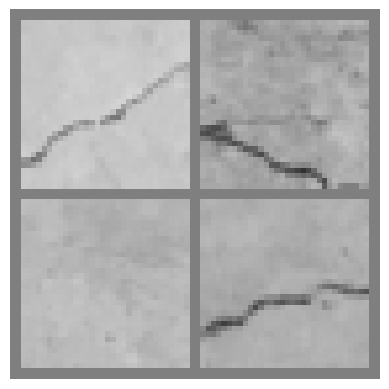

In [8]:
# check the data loader
for batch, (image_tensor, target) in enumerate(train_loader):
    print(batch)
    print('target', target)
    print(f'Number of tensor (Images) in batch: {len(image_tensor)}')
    image_sample = image_tensor[0]
    break

# check the data loader
for batch, (image_tensor, target) in enumerate(test_loader):
    print(batch)
    print('target', target)
    print(f'Number of tensor (Images) in batch: {len(image_tensor)}')
    image_sample = image_tensor[0]
    break

# how images look?
def imshow(image):
    image = image/2 + 0.5
    np_image = image.numpy()
    plt.imshow(np.transpose(np_image, (1,2,0)))
    plt.axis('off')
    plt.show()

# get one batch (Python 3 style)
data_iter = iter(train_loader)
images, targets = next(data_iter)

print(f'image size:{images[0].numpy().shape}')

grid = torchvision.utils.make_grid(images[:4], nrow=2)
imshow(grid)

# Load model and Training

In [9]:
# Load model
from model import ConcreteCrackClassifier
model = ConcreteCrackClassifier()

In [10]:
# Hyper parameters
LR = 0.01

# loss function
loss_fn = nn.BCELoss()

# Optimizer
optimizer = torch.optim.AdamW(model.parameters(), lr=LR)

In [12]:
# Training loop
EPOCHS = 10

for epoch in range(EPOCHS):
    for batch, (inputs, target) in enumerate(train_loader):

        # weights to zero grads
        optimizer.zero_grad()

        # Predictions (Farward pass)
        predictions = model(inputs)
        #print(f'pridictions: {predictions}')

        # Calculate the loss
        loss = loss_fn(predictions, target.reshape(-1,1).float())
        #print(f'Loss:{loss}')

        # Backward pass
        loss.backward()

        # Update the weights
        optimizer.step()

    if epoch % 100 == 0:
        print(f'Epoch {epoch}/{EPOCHS},'f'Loss: {loss.item():.4f}')



Epoch 0/10,Loss: 0.0029


# Evaluation

In [ ]:
# Evaluation

y_test = []
y_test_hat = []
for i, data in enumerate(test_loader, 0):
    inputs, y_test_temp = data
    with torch.no_grad():
        y_test_hat_temp = model(inputs).round()
    
    y_test.extend(y_test_temp.numpy())
    y_test_hat.extend(y_test_hat_temp.numpy())

acc = accuracy_score(y_test, y_test_hat)
print(f'Accuracy: {acc*100:.2f} %')

Accuracy: 98.91 %
